In [569]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import datetime

<a href="https://datarepository.wolframcloud.com/resources/Patient-Medical-Data-for-Novel-Coronavirus-COVID-19">Dataset link.</a>

In [570]:
df = pd.read_csv('data.csv')

In [571]:
df.head()

,Age,Sex,City,AdministrativeDivision,Country,GeoPosition,DateOfOnsetSymptoms,DateOfAdmissionHospital,DateOfConfirmation,Symptoms,...,TravelHistoryLocation,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDiseaseQ,ChronicDiseases,SequenceAvailable,DischargedQ,DeathQ,DateOfDeath,DateOfDischarge
0,48,"Entity[""Gender"", ""Female""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""cough"", ""fatigue"", ""fever"", ""sputum"", ""myalg...",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"{""diabetes"", ""cerebral infarction""}","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"DateObject[{2020, 1, 20}, ""Day"", ""Gregorian"", ...","Missing[""NotAvailable""]"
1,"Interval[{15, 88}]","Entity[""Gender"", ""Female""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 31}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""shortness of breath"", ""respiratory symptoms""}",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]"
2,61,"Entity[""Gender"", ""Male""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 20}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 27}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]",True,"DateObject[{2020, 1, 9}, ""Day"", ""Gregorian"", -5.]","Missing[""NotAvailable""]"
3,58,"Entity[""Gender"", ""Male""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 22}, ""Day"", ""Gregorian"",...","DateObject[{2020, 1, 1}, ""Day"", ""Gregorian"", -5.]","Missing[""NotAvailable""]","{""cough"", ""sputum"", ""fever""}",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"DateObject[{2020, 1, 23}, ""Day"", ""Gregorian"", ...","Missing[""NotAvailable""]"
4,66,"Entity[""Gender"", ""Male""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 22}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 31}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""cough""}",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"DateObject[{2020, 1, 21}, ""Day"", ""Gregorian"", ...","Missing[""NotAvailable""]"


In [572]:
df.describe()

,Age,Sex,City,AdministrativeDivision,Country,GeoPosition,DateOfOnsetSymptoms,DateOfAdmissionHospital,DateOfConfirmation,Symptoms,...,TravelHistoryLocation,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDiseaseQ,ChronicDiseases,SequenceAvailable,DischargedQ,DeathQ,DateOfDeath,DateOfDischarge
count,19467,19467,19467,19467,19467,19467,19467,19467,19467,19467,...,19467,19467,19467,19467,19467,19467,19467,19467,19467,19467
unique,209,3,720,463,137,1834,103,83,123,319,...,587,3,7,2,67,2,2,2,40,66
top,"Missing[""NotAvailable""]","Entity[""Gender"", ""Male""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Entity[""Country"", ""UnitedStates""]","GeoPosition[{25.6135986, -80.565963}]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","DateObject[{2020, 3, 26}, ""Day"", ""Gregorian"", ...","Missing[""NotAvailable""]",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]"
freq,2083,9717,12178,4226,6002,1079,15119,17601,1380,17781,...,14355,19392,19454,18717,19318,19461,19370,19317,19321,19106


Travel history location data is represented as a string of entities depicting the path the pacient has taken through different map points.

For a better representation we are going to represent it using one hot encoding using the unique locations as bits for the following reasons:
- we are not interested in order, just simply the locations
- it is easier to work and represent data in this way

In [573]:
# transform travel history from locations string to list of locations
travel_col = 'TravelHistoryLocation'
transform = lambda x: re.findall(r"Entity\[[^\]\[]+\]", x)
travel_lists = df[travel_col].apply(transform)
# get the unique locations found in the dataset
locs = np.concatenate(travel_lists.values)
unique_locs = np.unique(locs)
# transform travel history from list to one hot encoding
onehot = np.array([np.in1d(unique_locs, list_col) for list_col in travel_lists])
# create new dataframe using the unique locations as column headers
onehot_frame = pd.DataFrame(onehot, columns=unique_locs)
onehot_frame.head()

,"Entity[""AdministrativeDivision"", {""AbuDhabi"", ""UnitedArabEmirates""}]","Entity[""AdministrativeDivision"", {""Accra"", ""GreaterAccra"", ""Ghana""}]","Entity[""AdministrativeDivision"", {""AddisAbaba"", ""Ethiopia""}]","Entity[""AdministrativeDivision"", {""Aichi"", ""Japan""}]","Entity[""AdministrativeDivision"", {""Alabama"", ""UnitedStates""}]","Entity[""AdministrativeDivision"", {""Alberta"", ""Canada""}]","Entity[""AdministrativeDivision"", {""Alsace"", ""France""}]","Entity[""AdministrativeDivision"", {""Amsterdam"", ""NoordHolland"", ""Netherlands""}]","Entity[""AdministrativeDivision"", {""Andalo"", ""Trento"", ""TrentinoAltoAdige"", ""Italy""}]","Entity[""AdministrativeDivision"", {""Anhui"", ""China""}]",...,"Entity[""Country"", ""UnitedStates""]","Entity[""Country"", ""Uruguay""]","Entity[""Country"", ""VaticanCity""]","Entity[""Country"", ""Venezuela""]","Entity[""Country"", ""Vietnam""]","Entity[""Country"", ""Zambia""]","Entity[""Country"", ""Zimbabwe""]","Entity[""GeographicRegion"", ""Africa""]","Entity[""GeographicRegion"", ""Asia""]","Entity[""GeographicRegion"", ""Europe""]"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [574]:
# drop the old travel history column from the origin data frame
travel_dropped = df.drop(columns=['TravelHistoryLocation'], axis=1)
df = pd.concat([travel_dropped, onehot_frame], axis=1)

Splitting the geoposition entities into latitude and longitude, plus dropping the now redundant location features

In [575]:
# transform the geoposition column in two seperate column(lat, long)
transform = lambda x: re.findall(r"[+-]?[0-9]*[.]?[0-9]+", x)
latlong = df['GeoPosition'].apply(transform).values
# from array of lists to ndarray
latlong = np.vstack(latlong)
latlong_frame=pd.DataFrame(latlong, columns=['Latitute', 'Longitude'])
latlong_frame.describe()

,Latitute,Longitude
count,19467,19467
unique,1821,1819
top,25.6135986,-80.565963
freq,1079,1079


In [576]:
# drop redundant location columns and add the latitude/longitude frame
loc_dropped = df.drop(columns=['City', 'AdministrativeDivision', 'Country', 'GeoPosition'], axis=1)
df = pd.concat([loc_dropped, latlong_frame], axis=1)
df.head()

,Age,Sex,DateOfOnsetSymptoms,DateOfAdmissionHospital,DateOfConfirmation,Symptoms,LivesInWuhan,LivesInWuhanComment,TravelHistoryDates,ReportedMarketExposure,...,"Entity[""Country"", ""VaticanCity""]","Entity[""Country"", ""Venezuela""]","Entity[""Country"", ""Vietnam""]","Entity[""Country"", ""Zambia""]","Entity[""Country"", ""Zimbabwe""]","Entity[""GeographicRegion"", ""Africa""]","Entity[""GeographicRegion"", ""Asia""]","Entity[""GeographicRegion"", ""Europe""]",Latitute,Longitude
0,48,"Entity[""Gender"", ""Female""]","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""cough"", ""fatigue"", ""fever"", ""sputum"", ""myalg...",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.625059999999998,114.3421
1,"Interval[{15, 88}]","Entity[""Gender"", ""Female""]","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 31}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""shortness of breath"", ""respiratory symptoms""}","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.625059999999998,114.3421
2,61,"Entity[""Gender"", ""Male""]","DateObject[{2019, 12, 20}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 27}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.625059999999998,114.3421
3,58,"Entity[""Gender"", ""Male""]","DateObject[{2019, 12, 22}, ""Day"", ""Gregorian"",...","DateObject[{2020, 1, 1}, ""Day"", ""Gregorian"", -5.]","Missing[""NotAvailable""]","{""cough"", ""sputum"", ""fever""}",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.625059999999998,114.3421
4,66,"Entity[""Gender"", ""Male""]","DateObject[{2019, 12, 22}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 31}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""cough""}",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.625059999999998,114.3421


Transforming the age entities and dealing with age intervals

In [577]:
def age_transform(data):
    numbers = re.findall(r'[0-9]+', data)
    numbers = [int(x) for x in numbers]
    if len(numbers) == 1:
        return numbers[0]
    # age interval
    return sum(numbers) >> 1

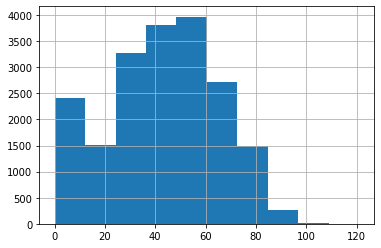

In [578]:
df['Age'] = df['Age'].apply(age_transform)
df['Age'].hist()

Transforming gender entities and filling missing data such that it mantains the initial distribution(where missing data is not counted) because it is a known fact that the disease is more prevalent among men(56% cases in the initial distribution).

In [579]:
def gender_transform(data):
    match = re.search(r"Male|Female", data)
    if not match:
        return None
    return match.group()

In [580]:
df['Sex'] = df['Sex'].apply(gender_transform)

In [581]:
counts = df['Sex'].value_counts(normalize=True)
print(counts, end="\n\n")
print(df['Sex'].describe())

Male      0.560704
Female    0.439296
Name: Sex, dtype: float64

count     17330
unique        2
top        Male
freq       9717
Name: Sex, dtype: object


In [582]:
missing = df['Sex'].isnull()
missing_size =  len(missing.index[missing == True])
print('Number of missing gender data:', missing_size)

Number of missing gender data: 2137


In [583]:
# fill missing data and mantain the distribution
fillers = ['Male' if np.random.random() <  counts.values[0] else 'Female' for _ in range(missing_size)]
df.loc[missing, 'Sex'] = fillers

In [584]:
print(df['Sex'].value_counts(normalize=True), end="\n\n")
print(df['Sex'].describe())

Male      0.563055
Female    0.436945
Name: Sex, dtype: float64

count     19467
unique        2
top        Male
freq      10961
Name: Sex, dtype: object


In [585]:
df['ReportedMarketExposure'].unique()

array(['Missing["NotAvailable"]', 'True', 'False'], dtype=object)

Computing delta(days) between DateOfAdmissionHospital and DateOfOnsetSymptoms
because data is more representative than actual dates

In [586]:
def date_transform(entity):
    pattern = r"[0-9]+"
    found = [int(x) for x in re.findall(pattern, entity)]
    if re.search(r'^DateInterval', entity):
        try:
            # try to find midpoint
            start = datetime.date(*found[0:3])
            end   = datetime.date(*found[3:6])
            mid = start + (end - start) / 2
            return mid
        except:
            # try and catch because of examples such this one...
            # DateInterval[{{{-Infinity, 1, 1}, {2020, 2, 25}}}, "Day", "Gregorian", -5.]
            # i mean wtf
            return np.nan
    
    if len(found) == 0: # missing data
        return np.nan
    # unpacking array to function arguments
    date = datetime.date(*found[:3])
    return date

In [587]:
adms_col  = 'DateOfAdmissionHospital'
onset_col = 'DateOfOnsetSymptoms'
delta_col = 'SymptomsAdmissionDelta'

delta_df = df[adms_col].apply(date_transform) - df[onset_col].apply(date_transform)
delta_df = delta_df.apply(lambda x: abs(x.days) if x else np.nan)
print(delta_df.describe())
delta_df = delta_df.fillna(delta_df.mean())

count    1111.000000
mean        5.295230
std         4.880847
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        50.000000
dtype: float64


In [588]:
df[delta_col] = delta_df
df = df.drop(columns=[adms_col, onset_col])
df.head()

,Age,Sex,DateOfConfirmation,Symptoms,LivesInWuhan,LivesInWuhanComment,TravelHistoryDates,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDiseaseQ,...,"Entity[""Country"", ""Venezuela""]","Entity[""Country"", ""Vietnam""]","Entity[""Country"", ""Zambia""]","Entity[""Country"", ""Zimbabwe""]","Entity[""GeographicRegion"", ""Africa""]","Entity[""GeographicRegion"", ""Asia""]","Entity[""GeographicRegion"", ""Europe""]",Latitute,Longitude,SymptomsAdmissionDelta
0,48,Female,"Missing[""NotAvailable""]","{""cough"", ""fatigue"", ""fever"", ""sputum"", ""myalg...",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,...,False,False,False,False,False,False,False,30.625059999999998,114.3421,5.29523
1,51,Female,"Missing[""NotAvailable""]","{""shortness of breath"", ""respiratory symptoms""}","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,...,False,False,False,False,False,False,False,30.625059999999998,114.3421,21.00000
2,61,Male,"Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,...,False,False,False,False,False,False,False,30.625059999999998,114.3421,7.00000
3,58,Male,"Missing[""NotAvailable""]","{""cough"", ""sputum"", ""fever""}",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,...,False,False,False,False,False,False,False,30.625059999999998,114.3421,10.00000
4,66,Male,"Missing[""NotAvailable""]","{""cough""}",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,...,False,False,False,False,False,False,False,30.625059999999998,114.3421,9.00000


One hot encoding for symptoms

In [589]:
# transform to list of symptoms
transform = lambda x: re.findall(r"\"([a-z ]+)\"", x)
symptoms_lists = df['Symptoms'].apply(transform)
# get the unique symptoms found in the dataset
symptoms = np.concatenate(symptoms_lists.values)
symptoms = np.unique(symptoms)
onehot = np.array([np.in1d(symptoms, list_col) for list_col in symptoms_lists])
# create new dataframe using the unique symptoms as column headers
onehot_frame = pd.DataFrame(onehot, columns=symptoms)
onehot_frame.head()

,abdominal pain,acute coronary syndrome,acute kidney injury,acute left heart failure,acute myocardial infarction,acute pharyngitis,acute renal failure,acute respiratory disease,acute respiratory disease syndrome,acute respiratory distress syndrome,...,sore limbs,sore muscle,sore throat,sputum,sweating,systemic weakness,toothache,vomiting,weakness,wheezing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [590]:
symptoms_dropped = df.drop(columns=['Symptoms'], axis=1)
df = pd.concat([symptoms_dropped, onehot_frame], axis=1)

In [591]:
df.head()

,Age,Sex,DateOfConfirmation,LivesInWuhan,LivesInWuhanComment,TravelHistoryDates,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDiseaseQ,ChronicDiseases,...,sore limbs,sore muscle,sore throat,sputum,sweating,systemic weakness,toothache,vomiting,weakness,wheezing
0,48,Female,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"{""diabetes"", ""cerebral infarction""}",...,False,False,False,True,False,False,False,False,False,False
1,51,Female,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
2,61,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
3,58,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",...,False,False,False,True,False,False,False,False,False,False
4,66,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False


One hot encoding for chronic diseases

In [592]:
# transform to list of symptoms
transform = lambda x: re.findall(r"\"([a-z ]+)\"", x)
diseases_lists = df['ChronicDiseases'].apply(transform)
# get the unique symptoms found in the dataset
diseases = np.concatenate(diseases_lists.values)
diseases = np.unique(diseases)
onehot = np.array([np.in1d(diseases, list_col) for list_col in diseases_lists])
# create new dataframe using the unique diseases as column headers
onehot_frame = pd.DataFrame(onehot, columns=diseases)
onehot_frame.head()

,asthma,atherosclerosis,atrial fibrillation,benign prostatic hyperplasia,benign prostatic hypertrophy,bronchial asthma,cardiac disease,cardiac dysrhythmia,cardiomyopathy,cardiovascular disease,...,on dialysis,prerenal azotemia,prostate cancer,prostate hypertrophy,stenocardia,systemic arterial hypertension,tongue cancer,tuberculosis,upper gastrointestinal bleeding,valvular heart disease
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [593]:
diseases_dropped = df.drop(columns=['ChronicDiseases', 'ChronicDiseaseQ'], axis=1)
df = pd.concat([diseases_dropped, onehot_frame], axis=1)

In [594]:
df.head()

,Age,Sex,DateOfConfirmation,LivesInWuhan,LivesInWuhanComment,TravelHistoryDates,ReportedMarketExposure,ReportedMarketExposureComment,SequenceAvailable,DischargedQ,...,on dialysis,prerenal azotemia,prostate cancer,prostate hypertrophy,stenocardia,systemic arterial hypertension,tongue cancer,tuberculosis,upper gastrointestinal bleeding,valvular heart disease
0,48,Female,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
1,51,Female,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
2,61,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
3,58,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
4,66,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False


In [595]:
# drop useless features
y = df['DeathQ']
df = df.drop(columns=['LivesInWuhanComment', 'TravelHistoryDates', 
                      'ReportedMarketExposureComment', 'SequenceAvailable',
                      'DateOfConfirmation', 'DischargedQ', 'DeathQ',
                      'DateOfDeath', 'DateOfDischarge'], axis=1)

In [596]:
df['LivesInWuhan'] = df['LivesInWuhan'].replace('Missing["NotAvailable"]', 'False')
df['ReportedMarketExposure'] = df['ReportedMarketExposure'].replace('Missing["NotAvailable"]', 'False')

In [597]:
print('Preprocessed dataset:')
df.head()

Preprocessed dataset:


,Age,Sex,LivesInWuhan,ReportedMarketExposure,"Entity[""AdministrativeDivision"", {""AbuDhabi"", ""UnitedArabEmirates""}]","Entity[""AdministrativeDivision"", {""Accra"", ""GreaterAccra"", ""Ghana""}]","Entity[""AdministrativeDivision"", {""AddisAbaba"", ""Ethiopia""}]","Entity[""AdministrativeDivision"", {""Aichi"", ""Japan""}]","Entity[""AdministrativeDivision"", {""Alabama"", ""UnitedStates""}]","Entity[""AdministrativeDivision"", {""Alberta"", ""Canada""}]",...,on dialysis,prerenal azotemia,prostate cancer,prostate hypertrophy,stenocardia,systemic arterial hypertension,tongue cancer,tuberculosis,upper gastrointestinal bleeding,valvular heart disease
0,48,Female,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,51,Female,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,61,Male,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,58,Male,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,66,Male,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [598]:
correlation_mat = df.corr()

As expected, the features are not strongly correlated, apart from chronic diseases/symptoms as seen in the bottom right corner(they were the last ones appended to the dataframe).

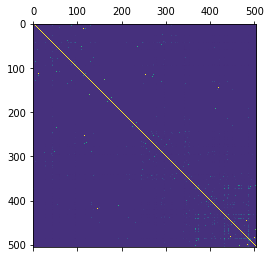

In [599]:
plt.matshow(correlation_mat)